## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Markov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probabily that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 

Final fraction of days in bull state: 0.6293937060629393
Final fraction of days in bear state: 0.3068369316306837
Final fraction of days in stagnant state: 0.06376936230637693


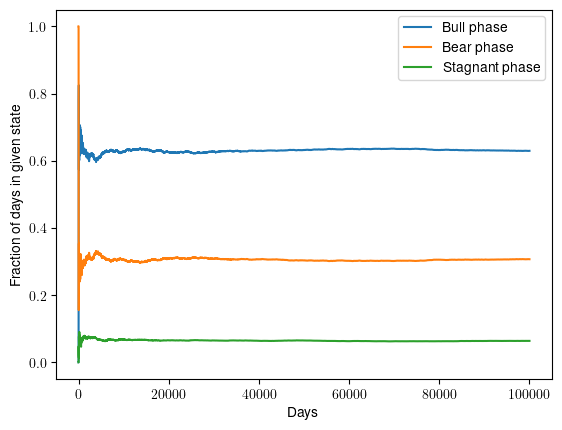

Pure python implementation speed:
137 ms ± 1.76 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)
numba implementation speed:
7.23 ms ± 77.8 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
import random
from numba import njit

def evolve_market(initial_phase, n):
    market = [initial_phase]
    phase = initial_phase
    for _ in range(int(n)):
        rnd = np.random.uniform()
        if phase == "bull":
            if ( rnd < 0.9 ):
                pass
            elif ( rnd >= 0.9 and rnd < 0.975 ):
                phase = "bear"
            else:
                phase = "stagnant"
        elif phase == "bear":
            if ( rnd < 0.8 ):
                pass
            elif (rnd >= 0.8 and rnd < 0.95 ):
                phase = "bull"
            else:
                phase = "stagnant"
        else:
            if ( rnd < 0.5 ):
                pass
            elif (rnd >= 0.5 and rnd < 0.75 ):
                phase = "bull"
            else:
                phase = "bear"
        market.append(phase)
            
    return market

# single run to check that everything is working properly
total_days = int(1e5)
phases = ["bull", "bear", "stagnant"]
phase0 = random.choice(phases)

market = evolve_market(phase0, total_days)

bull_count = 0
bear_count = 0
stagnant_count = 0
bull = []
bear = []
stagnant = []
for day in market:    
    if day == "bull":
        bull_count += 1
    elif day == "bear":
        bear_count += 1
    else:
        stagnant_count += 1
    bull.append(bull_count)
    bear.append(bear_count)
    stagnant.append(stagnant_count)

days=np.arange(1,len(market)+1)
bull /= days
bear /= days
stagnant /= days

print(f"Final fraction of days in bull state: {bull[-1]}")
print(f"Final fraction of days in bear state: {bear[-1]}")
print(f"Final fraction of days in stagnant state: {stagnant[-1]}")

fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"Days")
ax.set_ylabel(r"Fraction of days in given state")

plt.plot(days,bull, label="Bull phase")
plt.plot(days,bear, label="Bear phase")
plt.plot(days,stagnant, label="Stagnant phase")

plt.legend()

plt.show()

# time pure python implementation
print("Pure python implementation speed:")
%timeit -r 5 -n 5 evolve_market(phase0,total_days)

# time numba implementation
phase0 = random.choice(phases)
c_evolve_market = njit(evolve_market)
ignore = c_evolve_market(phase0,total_days) # here I toss away the first uncompiled run to make a fair comparison
print("numba implementation speed:")
%timeit -r 10 -n 50 c_evolve_market(phase0,total_days)

## Q2: Consistent plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should intialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifill, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker).  

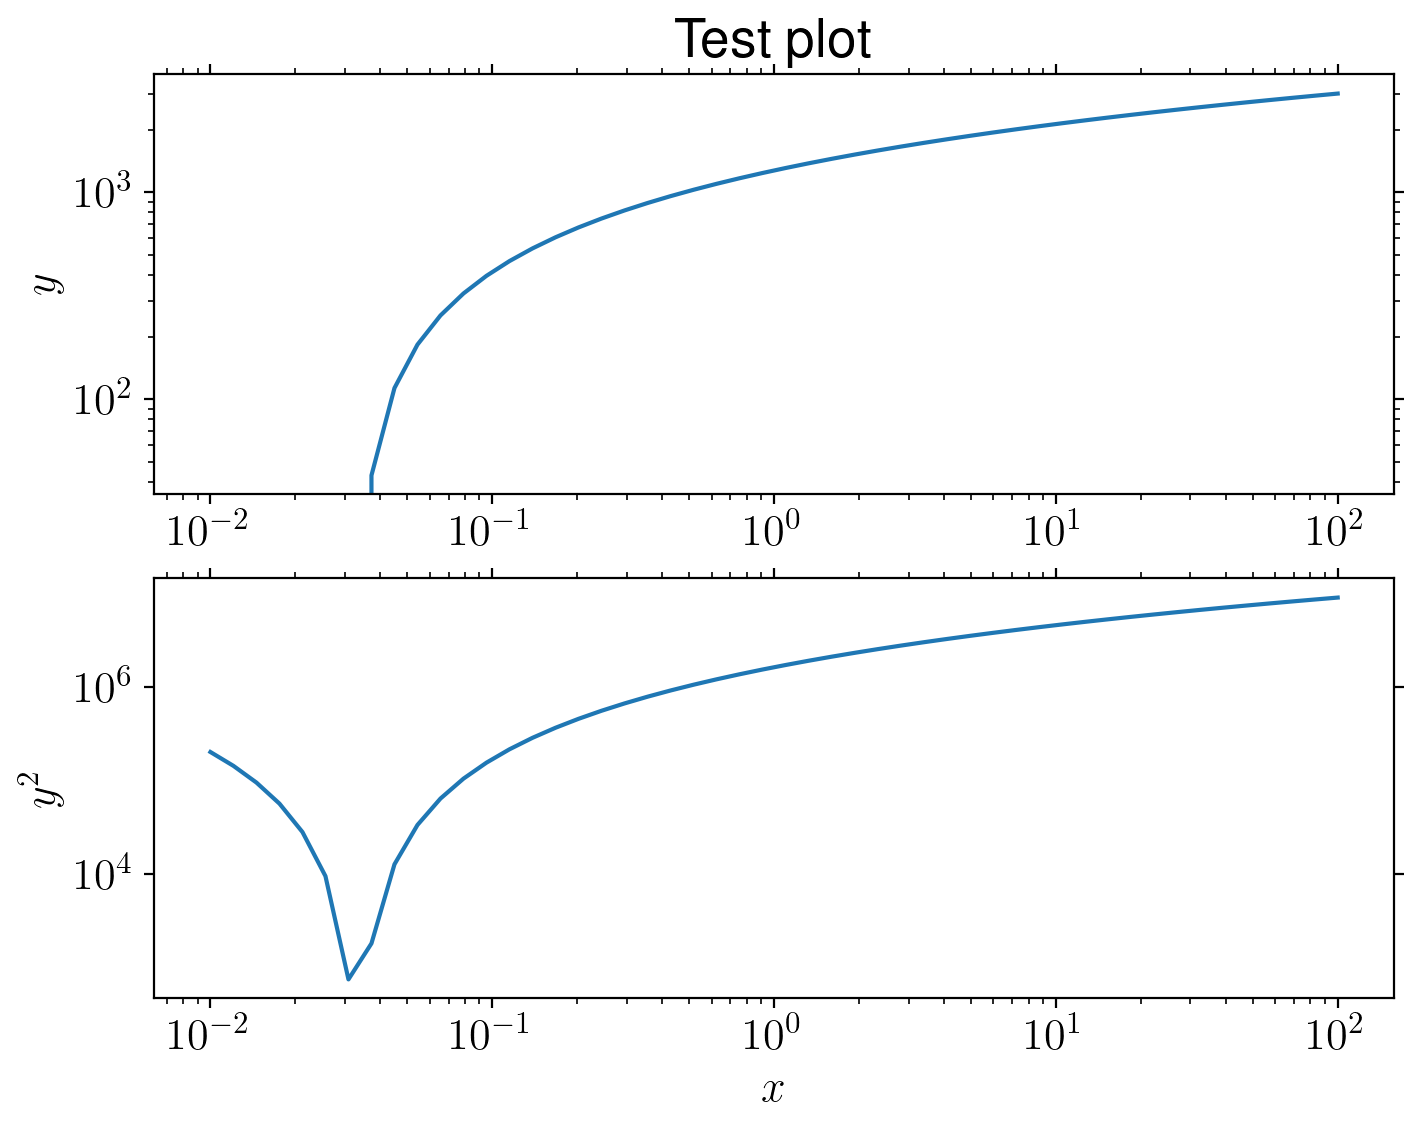

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def myplot(plot):
    def wrapper():
        plt.rcParams.update({
            "text.usetex": True,
            "font.family": "Helvetica",
            "font.size": 16,
            "axes.formatter.limits": "-3, 3",
            "xtick.top": True,
            "ytick.right": True,
            "figure.figsize": "8, 6",
            "figure.dpi": 200,
            "errorbar.capsize": 3,
            "savefig.format": "pdf"
        })
        
        fig = plot()

        fig.savefig("test_plot.pdf")

        return

    return wrapper

# test plot
@myplot
def test_plot():
    fig = plt.figure()
    fig.tight_layout()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    x = np.logspace(-2,2)
    y = np.linspace(-450,3000)
    ax1.set_title("Test plot")
    ax1.plot(x,y)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$y$")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax2.plot(x,y**2)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$y^2$")
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
    return fig


test_plot()